In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import geopandas as gpd 
import matplotlib.pyplot as plt
# import folium 
from shapely.ops import nearest_points
from shapely.geometry import LineString

In [2]:
border= gpd.read_file('../migrant_deaths_analysis/distance_from_roads_towns_border/border/border_shapefile/Mexico_and_US_Border.shp')
# border = border.set_crs('epsg:4326')
# deaths=deaths[deaths['Latitude'].notnull()]
# border = border.to_crs('epsg:3857')


border = border.to_crs('epsg:26912')

deaths = gpd.read_file("../migrant_deaths_analysis/death_files/ogis_migrant_deaths_091021_with_yuma.geojson")


deaths['Latitude']= deaths.Latitude.astype(float)
deaths['Longitude']= deaths.Longitude.astype(float)
deaths = gpd.GeoDataFrame(deaths, geometry=gpd.points_from_xy(deaths.Longitude,deaths.Latitude))

deaths = deaths.set_crs('epsg:4326')
deaths = deaths.to_crs('epsg:26912')


deaths['Reporting Date']= pd.to_datetime(deaths['Reporting Date'])
deaths['Reporting_year']= pd.to_datetime(deaths['Reporting Date']).dt.year



print(deaths.total_bounds)

print(deaths.total_bounds[0])
print(deaths.total_bounds[1])


minx, miny, maxx, maxy = deaths.total_bounds

[ 142056.70426092 3466477.1635584               inf              inf]
142056.7042609239
3466477.1635584


In [3]:
border = border.dissolve(by='OBJECTID')
border

,geometry,FID,PERMANENT_,SOURCE_FEA,SOURCE_DAT,SOURCE_D_1,SOURCE_ORI,DATA_SECUR,DISTRIBUTI,LOADDATE,FCODE,COUNTRY_FI,COUNTRY_NA,POPULATION,AREASQKM,GAZ_ID,SHAPE_LENG,SHAPE_Le_1
OBJECTID,,,,,,,,,,,,,,,,,,
6,"MULTILINESTRING ((1917779.556 2950240.964, 189...",1,None,None,None,None,None,0,None,None,0,None,None,0,0.0,0,32.055123,3.740154e+06


In [5]:
deaths = deaths.reset_index()
deaths

,index,ML Number,Name,Sex,Age,Reporting Date,Surface Management,Location,Location Precision,Corridor Code,Corridor,Cause of Death,OME Determined COD,Condition Code,Body Condition,Post Mortem Interval,State,County,Latitude,Longitude,UTM X,UTM Y,Date,OME number,YCSO number,Nationality,geometry,Reporting_year
0,0,00-00097,Unidentified,male,,2000-01-10,Cocopah Indian Reservation,,"physical description with directions, distance...",12,Yuma,None,UNDETERMINED - MUMMIFIED AND SKELETAL REMAINS,4,Skeletonization w/ mummification,< 5 weeks,Arizona,YUMA,32.589668,-114.799807,143294,3612175,2000-01-10T00:00:00,None,None,None,POINT (143293.359 3612175.618),2000.0
1,1,00-00148,"Nicolas, Tomas",male,17,2000-01-22,State of Arizona,,"physical description with directions, distance...",4,Patagonia,None,HYPOTHERMIA,1,Fully fleshed,< 1 day,Arizona,PIMA,31.812406,-110.483205,548914,3519758,2000-01-22T00:00:00,None,None,None,POINT (548913.472 3519758.907),2000.0
2,2,00-00189,Unidentified,male,,2000-01-20,US Forest Service,,"physical description with directions, distance...",5,Nogales,None,UNDETERMINED - SKELETAL REMAINS,7,Complete skeletonization w/ bone degradation,> 6-8 months,Arizona,SANTA CRUZ,31.568000,-111.151300,485643,3492563,2000-01-20T00:00:00,None,None,None,POINT (485642.300 3492563.305),2000.0
3,3,00-00222,Unidentified,male,,2000-01-10,Private,,"physical description with directions, distance...",9,Ajo,None,UNDETERMINED - SKELETAL REMAINS,6,Complete skeletonization w/ disarticulation,< 6-8 months,Arizona,PIMA,32.355997,-112.826855,328102,3581363,2000-01-10T00:00:00,None,None,None,POINT (328101.292 3581363.326),2000.0
4,4,00-00245,"Candia-Bravo, Maria Del Rocio",female,20,2000-02-05,Tohono Oodham Nation,,"physical description with directions, distance...",7,San Miguel,None,MULTIPLE BLUNT FORCE INJURIES,1,Fully fleshed,< 1 day,Arizona,PIMA,31.717790,-111.779830,426116,3509419,2000-02-05T00:00:00,None,None,None,POINT (426115.142 3509419.894),2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3867,3867,None,None,,,NaT,,None,None,None,None,,None,None,None,None,None,None,32.169783,-113.708617,None,None,2021-06-26T00:00:00,2021-873,,,POINT (244587.712 3562470.977),NaN
3868,3868,None,None,,,NaT,,None,None,None,None,,None,None,None,None,None,None,32.339117,-113.714883,None,None,2021-06-28T00:00:00,2021-882,,,POINT (244471.904 3581265.171),NaN
3869,3869,None,None,,,2021-07-03,,None,None,None,None,,None,None,None,None,None,None,32.492653,-114.560416,None,None,2021-07-03T00:00:00,2021-897,,,POINT (165418.572 3600633.523),2021.0
3870,3870,None,None,,,NaT,,None,None,None,None,,None,None,None,None,None,None,32.449628,-113.910257,None,None,2021-07-09T00:00:00,2021-926,,,POINT (226410.309 3594005.465),NaN


In [6]:

# distances1 = 
# min_idx1 = distances1.idxmin()


# distances1

def calculate_distance(row, lines):
    
#     print(row['index'])
    distances1 = lines.distance(row['geometry'])

    
    min_val=distances1.min()

    return  min_val

    
#     print( row['geometry'][0])

deaths['border_distance'] = deaths.apply(lambda row : calculate_distance(row, border),axis=1)
                                      
                                      
                                      
                                      
deaths['border_distance_miles'] = (deaths['border_distance']/1609.34)
deaths

deaths.to_csv('../migrant_deaths_analysis/distance_from_roads_towns_border/border/deaths_border.csv')


In [7]:
import numpy as np

pd.set_option('display.max_rows', 500)

print(deaths['border_distance_miles'].max())
deaths


x = [*range(0,171)]
print(x)

# ax.set_xticklabels(x);

# ax.set_xticks(x)



deaths_num = np.histogram(deaths['border_distance_miles'], bins=x)[0]

distance = np.histogram(deaths['border_distance_miles'], bins=x)[1]

# print(deaths_num)
# deaths_num = deaths_num.append(0)
# print(len(deaths_num))
deaths_num=np.append(deaths_num, 0)

# print(distance)

# print(len(distance))
# print(len(deaths_num))


dataset = pd.DataFrame({'deaths': deaths_num, 'distance': distance})
dataset




1.1170375028659673e+305
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]


,deaths,distance
0,138,0
1,79,1
2,93,2
3,86,3
4,86,4
5,79,5
6,73,6
7,74,7
8,86,8
9,62,9


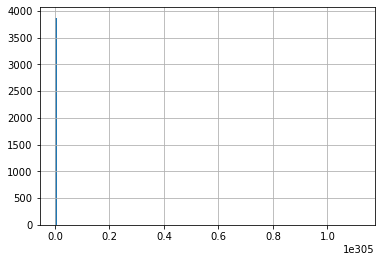

In [8]:
ax = deaths['border_distance_miles'].hist(bins=171)  

In [9]:
miles_15_55 = deaths[(deaths['border_distance_miles']>= 15)&(deaths['border_distance_miles']<= 55)]

miles_15 = deaths[(deaths['border_distance_miles']<= 15)]

miles_55 = deaths[(deaths['border_distance_miles']>= 55)]

print(len(miles_15_55))
print(len(miles_15_55)/len(deaths))

print(len(miles_15))
print(len(miles_15)/len(deaths))

print(len(miles_55))
print(len(miles_55)/len(deaths))


1990
0.5139462809917356
1201
0.31017561983471076
681
0.1758780991735537


In [10]:
deaths_by_year = deaths['Reporting_year'].value_counts(dropna=False).reset_index().sort_values(by=['index'],ascending=False)
deaths_by_year.to_csv('deaths_by_year.csv')
deaths_by_year



,index,Reporting_year
9,2021.0,170
0,2020.0,237
14,2019.0,156
18,2018.0,128
19,2017.0,124
11,2016.0,166
16,2015.0,150
17,2014.0,143
6,2013.0,192
13,2012.0,164


In [16]:
print('total:')
print(len(deaths))

deaths = gpd.read_file("../migrant_deaths_analysis/death_files/ogis_migrant_deaths_091021_with_yuma.geojson")
print(len(deaths))

deaths['Date']= pd.to_datetime(deaths['Reporting Date'])
# result['year'] = result['Date'].dt.year
# result['month'] = result['Date'].dt.month
bush1 = deaths[(deaths['Date']>= pd.Timestamp('2001-01-20'))&(deaths['Date']< pd.Timestamp('2005-01-20'))]
print(len(bush1))
bush2 = deaths[(deaths['Date']>= pd.Timestamp('2005-01-20'))&(deaths['Date']< pd.Timestamp('2009-01-20'))]
print(len(bush2))
obama1 = deaths[(deaths['Date']>= pd.Timestamp('2009-01-20'))&(deaths['Date']< pd.Timestamp('2013-01-20'))]
print(len(obama1))
obama2 = deaths[(deaths['Date']>= pd.Timestamp('2013-01-20'))&(deaths['Date']< pd.Timestamp('2017-01-20'))]
print(len(obama2))
trump1 = deaths[(deaths['Date']>= pd.Timestamp('2017-01-20'))&(deaths['Date']< pd.Timestamp('2021-01-20'))]
print(len(trump1))
biden1 = deaths[(deaths['Date']>= pd.Timestamp('2021-01-20'))]
print(len(biden1))


deaths['Date'].dtypes

total:
3914
3914
586
802
786
661
648
211


dtype('<M8[ns]')

In [12]:
deaths['Date']

0      2000-01-10
1      2000-01-22
2      2000-01-20
3      2000-01-10
4      2000-02-05
          ...    
3867          NaT
3868          NaT
3869   2021-07-03
3870          NaT
3871   2021-07-24
Name: Date, Length: 3872, dtype: datetime64[ns]

In [13]:
one_day_deaths_by_year=deaths[deaths['Post Mortem Interval']=='< 1 day']['Reporting_year'].value_counts(dropna=False).reset_index().sort_values(by=['index'],ascending=False)
one_day_deaths_by_year.to_csv('one_day_deaths_by_year.csv')
one_day_deaths_by_year

,index,Reporting_year
10,2021.0,40
11,2020.0,39
21,2019.0,11
18,2018.0,18
20,2017.0,11
16,2016.0,25
17,2015.0,19
19,2014.0,14
13,2013.0,37
15,2012.0,28
